### Script for reading data for Problem 5.1 (data_AlgaeGrowth.txt) in Applied Statistics 2021 exam:

This script reads the file __"data_AlgaeGrowth.txt"__ for Problem 5.1 in the exam of Applied Statistics 2021/22. This data files contains 90 entries in three columns: 
* **time** (hours) of measurement,
* **area** ($\mathrm{cm}^2$) of the algae coverage,
* **area uncertainty** ($\mathrm{cm}^2$).

The script was distributed along with the exam and the data file itself on the 20th of January 2022.

####  Author: 
- Troels Petersen (Niels Bohr Institute, petersen@nbi.dk)

####  Date:   
 - 19th of January 2022 (first version)

In [19]:
import random
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Modules to see files and folders in directories
from scipy import stats
from scipy.stats import binom, poisson, norm ,gamma           # Functions from SciPy Stats...
# import scipy.optimize as optimization
from scipy import optimize
from numpy.linalg import inv
from functools import partial
from fitter import Fitter
from astropy.modeling import models, fitting

In [20]:
import pandas as pd

In [21]:
sys.path.append('D:\my github\Siyi Applied Stats\Documents for JN\AppStat2021-main\External_Functions\\')
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax    # Useful functions to print fit results on figure

plt.rcParams['font.size'] = 18     # Set some basic plotting parameters

In [22]:
dataframe = pd.read_csv('data_AlgaeGrowth.csv', header=0, index_col=None)
time, area, err_area = dataframe.values.T
dataframe

,time(days),area(cm2),err_area(cm2)
0,0.35,1470.40,45.0
1,0.57,1426.93,45.0
2,0.60,1466.84,45.0
3,0.90,1580.44,45.0
4,1.08,1626.27,45.0
...,...,...,...
85,11.71,1974.83,45.0
86,11.85,2044.98,45.0
87,11.93,2059.38,45.0
88,12.26,2014.04,45.0


Print the first 10 entries to check the content of the file:

In [23]:
for i in range(10):
    print(f"  time = {time[i]:4.2f} hrs    area = {area[i]:6.2f} cm2    err_area = {err_area[i]:5.2f} cm2")

  time = 0.35 hrs    area = 1470.40 cm2    err_area = 45.00 cm2
  time = 0.57 hrs    area = 1426.93 cm2    err_area = 45.00 cm2
  time = 0.60 hrs    area = 1466.84 cm2    err_area = 45.00 cm2
  time = 0.90 hrs    area = 1580.44 cm2    err_area = 45.00 cm2
  time = 1.08 hrs    area = 1626.27 cm2    err_area = 45.00 cm2
  time = 1.30 hrs    area = 1624.67 cm2    err_area = 45.00 cm2
  time = 1.51 hrs    area = 1559.46 cm2    err_area = 45.00 cm2
  time = 1.64 hrs    area = 1577.22 cm2    err_area = 45.00 cm2
  time = 1.86 hrs    area = 1626.99 cm2    err_area = 45.00 cm2
  time = 2.03 hrs    area = 1710.10 cm2    err_area = 45.00 cm2


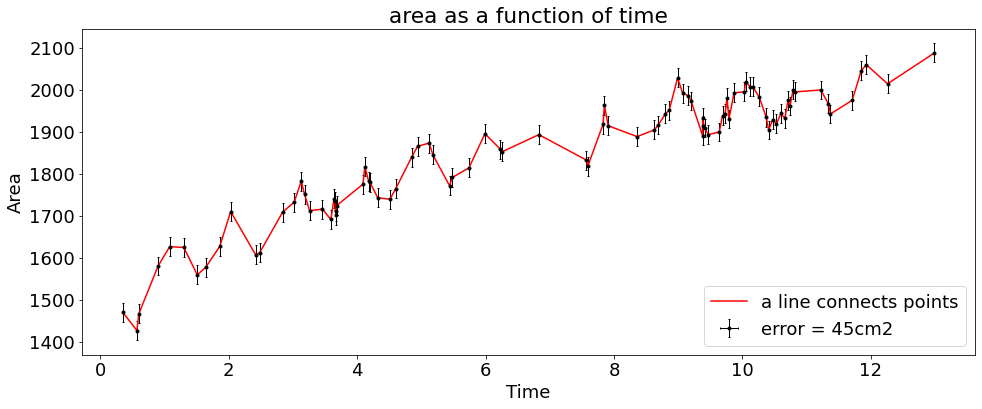

In [24]:
x = time
y = area
sy = err_area/2

fig, ax = plt.subplots(figsize=(16, 6))  # figsize is in inches
ax.errorbar(x, y, yerr=sy, xerr=0.0, label='error = 45cm2', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)

ax.plot(x, y,color="red", label='a line connects points')
ax.set(xlabel="Time", # the label of the y axis
       ylabel="Area",  # the label of the y axis
       title="area as a function of time"# the title of the plot
      ) # Setting the miminum to zero
ax.legend(loc='lower right', fontsize=18); # could also be # loc = 'upper right' e.g.
plt.savefig('fig13',dpi=600)
#fig.tight_layout()

In [35]:
mean_0=0.0
mean_1=0.0
mean_2=0.0
mean_3=0.0
mean_4=0.0
mean_5=0.0
mean_6=0.0
mean_7=0.0
mean_8=0.0
mean_9=0.0
mean_10=0.0
mean_11=0.0
mean_12=0.0

t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10,t_11,t_12=0,0,0,0,0,0,0,0,0,0,0,0,0

for u in range(90):
    if time[u]<1:
        mean_0+=area[u]
        t_0+=1
    if time[u]<2 and time[u]>=1:
        mean_1+=area[u]
        t_1+=1
    if time[u]<3 and time[u]>=2:
        mean_2+=area[u]
        t_2+=1        
    if time[u]<4 and time[u]>=3:
        mean_3+=area[u]
        t_3+=1  
    if time[u]<5 and time[u]>=4:
        mean_4+=area[u]
        t_4+=1
    if time[u]<6 and time[u]>=5:
        mean_5+=area[u]
        t_5+=1        
    if time[u]<7 and time[u]>=6:
        mean_6+=area[u]
        t_6+=1        
    if time[u]<8 and time[u]>=7:
        mean_7+=area[u]
        t_7+=1        
    if time[u]<9 and time[u]>=8:
        mean_8+=area[u]
        t_8+=1
    if time[u]<10 and time[u]>=9:
        mean_9+=area[u]
        t_9+=1        
    if time[u]<11 and time[u]>=10:
        mean_10+=area[u]
        t_10+=1        
    if time[u]<12 and time[u]>=11:
        mean_11+=area[u]
        t_11+=1
    if time[u]<13 and time[u]>=12:
        mean_12+=area[u]
        t_12+=1        

mean_0=mean_0/t_0
mean_1=mean_1/t_1
mean_2=mean_2/t_2
mean_3=mean_3/t_3
mean_4=mean_4/t_4
mean_5=mean_5/t_5
mean_6=mean_6/t_6
mean_7=mean_7/t_7
mean_8=mean_8/t_8
mean_9=mean_9/t_9
mean_10=mean_10/t_10
mean_11=mean_11/t_11
mean_12=mean_12/t_12

area2=np.zeros(13)
print(area2)
area2[0]=mean_0
area2[1]=mean_1
area2[2]=mean_2
area2[3]=mean_3
area2[4]=mean_4
area2[5]=mean_5
area2[6]=mean_6
area2[7]=mean_7
area2[8]=mean_8
area2[9]=mean_9
area2[10]=mean_10
area2[11]=mean_11
area2[12]=mean_12

time2=[0,1,2,3,4,5,6,7,8,9,10,11,12]
err_area2=np.ones_like(time2)*45
print(area2,time2,err_area2)
time2=np.array(time2)
type(time2)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1486.1525     1602.922      1659.3475     1726.83909091 1789.37
 1831.50833333 1867.97       1888.974      1938.42333333 1940.99214286
 1966.86866667 1997.81       2050.765     ] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] [45 45 45 45 45 45 45 45 45 45 45 45 45]


numpy.ndarray

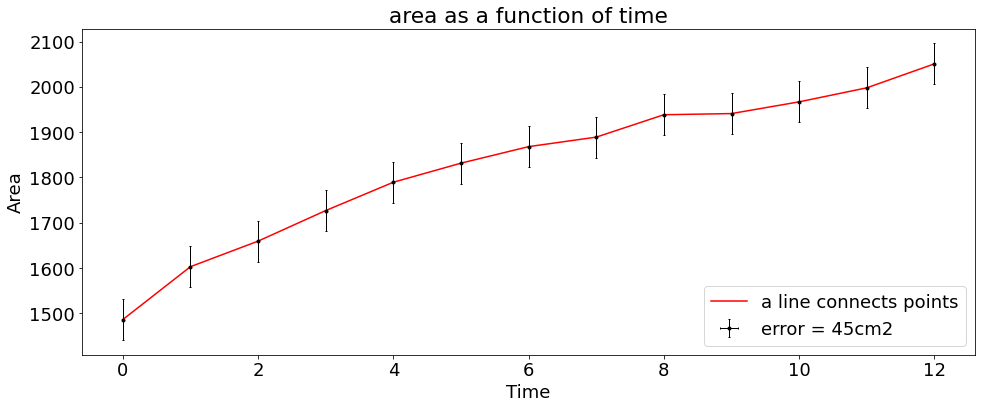

In [36]:
x = time2
y = area2
sy = err_area2/2

fig, ax = plt.subplots(figsize=(16, 6))  # figsize is in inches
ax.errorbar(x, y, yerr=err_area2, xerr=0.0, label='error = 45cm2', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)

ax.plot(x, y,color="red",label='a line connects points')
ax.set(xlabel="Time", # the label of the y axis
       ylabel="Area",  # the label of the y axis
       title="area as a function of time"# the title of the plot
      ) # Setting the miminum to zero
ax.legend(loc='lower right', fontsize=18); # could also be # loc = 'upper right' e.g.
plt.savefig('fig13',dpi=600)
#fig.tight_layout()

In [37]:
def fit_pdf(x,a,b,c,d):
    return a*x**3 + b*x**2+ c*x + d

In [38]:

Minuit.print_level = 1    # Print result of fits (generally - can also be moved down to each fit instance)

# Defining Chi2 calculation:
def chi2_owncalc(a,b,c,d) :
    y_fit = fit_pdf(x,a,b,c,d)
    chi2 = np.sum(((y - y_fit) / sy)**2)
    return chi2

# Alternatively, use the Chi2 regression from External Functions:
chi2fit = Chi2Regression(fit_pdf, x, y, sy)

minuit_chi2 = Minuit(chi2_owncalc,a=2,b=3,c=2,d=1400)
minuit_chi2.errordef = 1.0     # This is the definition for ChiSqaure fits
minuit_chi2.migrad()           # This is where the minimisation is carried out! Put ";" at the end to void output


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.829                      │              Nfcn = 98               │
│ EDM = 3.48e-18 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.40    │   0.16    │            │            │         │         │       │
│ 1 │ b    │   -10.0   │    2.9    │            │            │         │         │       │
│ 2 │ c    │    108    │    14     │            │            │         │         │       │
│ 3 │ d    │  1.490e3  │  0.019e3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────┐
│   │      a      b      c      d │
├───┼─────────────────────────────┤
│ a │ 0.0246 -0.443   2.04  -1.62 │
│ b │ -0.443   8.22  -39.8   34.8 │
│ c │   2.04  -39.8    209   -218 │
│ d │  -1.62   34.8   -218    369 │
└───┴─────────────────────────────┘

In [39]:

# First, check if the result was a valid minimum:
if (not minuit_chi2.fmin.is_valid) :
    print("  WARNING: The ChiSquare fit DID NOT converge!!! ")    
    
# Short hand way of accessing the fit parameters:
fit_a,fit_b,fit_c,fit_d= minuit_chi2.values[:]   # The fitted values of the parameters

# Loop to get both parameter values and uncertainties:
for name in minuit_chi2.parameters :
    value, error = minuit_chi2.values[name], minuit_chi2.errors[name]
    print(f"Fit value: {name} = {value:.5f} +/- {error:.5f}")

# Get Chi2 value:
chi2_value = minuit_chi2.fval            # The value minimised, i.e. Chi2 or -2*LogLikeliHood (LLH) value

# Get number of degrees-of-freedom (Ndof):
N_NotEmptyBin = np.sum(y > 0)
Ndof_value = N_NotEmptyBin - minuit_chi2.nfit

Prob_value = stats.chi2.sf(chi2_value, Ndof_value) # The chi2 probability given N_DOF degrees of freedom
print(f"Chi2 value: {chi2_value:.1f}   Ndof = {Ndof_value:.0f}    Prob(Chi2,Ndof) = {Prob_value:5.3f}")


Fit value: a = 0.40185 +/- 0.15679
Fit value: b = -9.96171 +/- 2.86670
Fit value: c = 107.79902 +/- 14.44130
Fit value: d = 1489.99034 +/- 19.19780
Chi2 value: 1.8   Ndof = 9    Prob(Chi2,Ndof) = 0.994


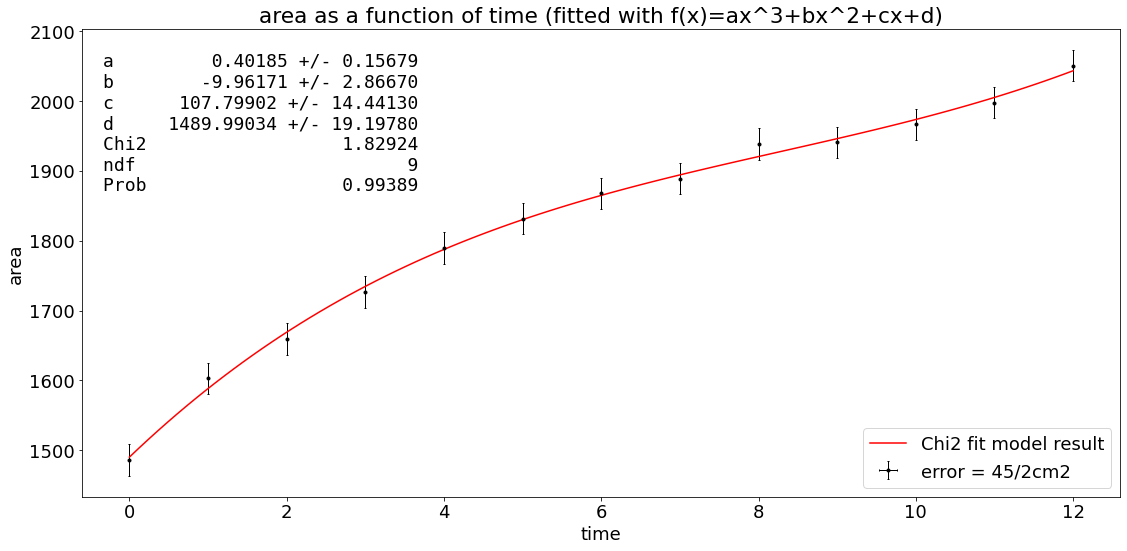

In [42]:

fig, ax = plt.subplots(figsize=(16, 8))  # figsize is in inches
ax.errorbar(x, y, yerr=sy, xerr=0.0, label='error = 45/2cm2', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)

# Set the figure texts; xlabel, ylabel and title.
ax.set(xlabel="time", # the label of the y axis
       ylabel="area",  # the label of the y axis
       title="area as a function of time (fitted with f(x)=ax^3+bx^2+cx+d)"# the title of the plot
      ) # Setting the miminum to zero
x_axis = np.linspace(np.min(time2), np.max(time2), 100)
ax.plot(x_axis, fit_pdf(x_axis, *minuit_chi2.values[:]), '-r', label='Chi2 fit model result') 

# Adding fit results to plot:
d = {'a': [minuit_chi2.values['a'], minuit_chi2.errors['a']],
     'b': [minuit_chi2.values['b'], minuit_chi2.errors['b']],
     'c': [minuit_chi2.values['c'], minuit_chi2.errors['c']],
     'd': [minuit_chi2.values['d'], minuit_chi2.errors['d']],
     'Chi2':     chi2_value,
     'ndf':      Ndof_value,
     'Prob':     Prob_value,
    }

text = nice_string_output(d, extra_spacing=2, decimals=5)
add_text_to_ax(0.02, 0.95, text, ax, fontsize=18)
ax.legend(loc='lower right', fontsize=18); # could also be # loc = 'upper right' e.g.

fig.tight_layout()
plt.savefig('fig18',dpi=600)


In [31]:
def residuals_pdf(x):
    return 0.40185*x**3 + -9.96171*x**2 + 107.79902*x**1 + 1489.99034*x**0

In [32]:
residuals=np.zeros_like(y)

for j in range(13):
    residuals[j]=y[j]-residuals_pdf(x[j])
print(residuals.size)

p=0  # >0, + 
q=0  # <0, -
for m in range(13):
    if residuals[m]>0:
        p += 1
    if residuals[m]<0:
        q += 1
print(p,q)

residuals_d=np.zeros_like(residuals)
for n in range(13):
    if residuals[n]>0:
        residuals_d[n]=1
    else:
        residuals_d[n]=0
print(residuals_d)

13
6 7
[0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.]


In [33]:
y_0=np.zeros_like(y)
for k in range(90):
    y_0[k]=0
print(y_0.size)

IndexError: index 13 is out of bounds for axis 0 with size 13

In [ ]:

fig, ax2 = plt.subplots(figsize=(16, 8))  # figsize is in inches
ax2.errorbar(x, residuals, yerr=sy, xerr=0.0, label='residuals', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)
ax2.plot(x, y_0, '-r', label='y=0') 

# Set the figure texts; xlabel, ylabel and title.
ax2.set(xlabel="time", # the label of the y axis
       ylabel="area",  # the label of the y axis
       title="residuals (after fitting)"# the title of the plot
      ) # Setting the miminum to zero


# Define the figure text
d2 = {'Entries': len(residuals),
      'number of +': p,      
      'number of -': q,
    }

d3 = {
      'run':residuals_d
    }

# Add figure text
text = nice_string_output(d2, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.97, text, ax2, fontsize=18)
text = nice_string_output(d3, extra_spacing=2, decimals=3)
add_text_to_ax(0.2, 0.97, text, ax2, fontsize=12)

ax2.legend(loc='lower right', fontsize=18); # could also be # loc = 'upper right' e.g.

fig.tight_layout()
plt.savefig('fig12',dpi=600)


In [ ]:
N_a= 14  # runs of a
N_b=14  # runs of b
N = N_a+N_b  # sum run
mean = 1+ (2*N_a*N_b)/N
variance = (2*N_a*N_b*(2*N_a*N_b-N))/(N**2*(N-1))
sigma = np.sqrt(variance)
print("mean is：%f" %mean,"sigma is：%f" %sigma)

In [ ]:
4/1.65